In [1]:
import pickle

with open( 'credit.pkl' , 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [2]:
x_credit_treinamento.shape, y_credit_treinamento.shape 


((1500, 3), (1500,))

In [3]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [4]:
from sklearn.naive_bayes import GaussianNB


naive_credit_data = GaussianNB() # Cria o modelo
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento) # Treina o modelo

# Com isso, o modelo já está treinado e pronto para fazer previsões

GaussianNB()

In [5]:
previsoes = naive_credit_data.predict(x_credit_teste) # Faz as previsões

In [6]:
# previsoes

In [7]:
# y_credit_teste

Obviamente não precisa-se comparar linha por linha das previsões, pois o sklearn já faz isso para nós. com auxilio da função accuracy_score, podemos comparar as previsões com os valores reais e obter a acurácia do modelo.

In [8]:
from sklearn.metrics import accuracy_score , classification_report

accuracy_score(y_credit_teste, previsoes)

# o modelo acertou 93.8% das previsões

0.938

### Entendendo  a Matriz de Confusão

A matriz de confusão é uma tabela que nos permite a visualização do desempenho de um algoritmo de classificação. A ideia é verificar a acurácia do modelo, ou seja, a quantidade de acertos e erros.

[428,   8]

[ 23,  41]

Neste exemplo, temos 428+41 = 469 acertos e 23+8 = 31 erros. A diagonal principal da matriz de confusão nos mostra os acertos, enquanto a diagonal secundária nos mostra os erros.

In [9]:
# Matriz de confusão

from sklearn.metrics import confusion_matrix

confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]], dtype=int64)

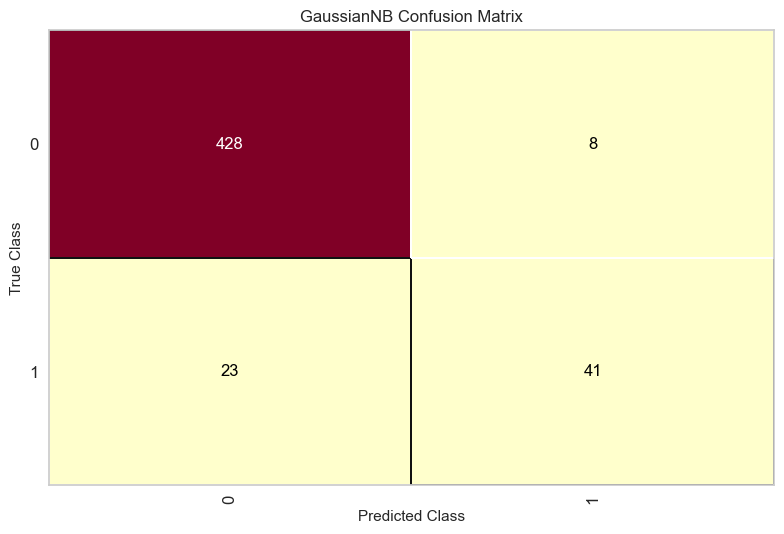

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [10]:
# Visualizando a matriz de confusão
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)
cm.poof()

In [11]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



#### Conclusões a partir do algoritmo Naive Bayes:

- O algoritmo encontrou 64% dos casos da classe 1 e acertou 84% destes encontrados
- O algoritmo encontrou 98% dos casos da classe 0 e acertou 95% destes encontrados

Conclui-se que o algoritmo se dá muito bem com os dados da classe 0 e medianamente bem com os dados da classe 1.

## Árvore de Decisão

In [12]:
import pickle

with open( 'credit.pkl' , 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [13]:
x_credit_treinamento.shape, y_credit_treinamento.shape

# Treinaremos nossa árvore de decisão com o conjunto de treinamento de 1500 registros e 3 colunas

((1500, 3), (1500,))

In [14]:
x_credit_teste.shape, y_credit_teste.shape

# Testaremos o modelo com o conjunto de teste de 500 registros

((500, 3), (500,))

In [15]:
from sklearn.tree import DecisionTreeClassifier

arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0) # Cria o modelo
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento) # Treina o modelo



DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
previsoes = arvore_credit.predict(x_credit_teste) # Faz as previsões
# previsoes

In [17]:
# Comparando com as respostas reais que já estão no conjunto de teste

# y_credit_teste

In [18]:
# Gerando métricas

from sklearn.metrics import accuracy_score , classification_report

accuracy_score(y_credit_teste, previsoes)*100

98.2

0.982

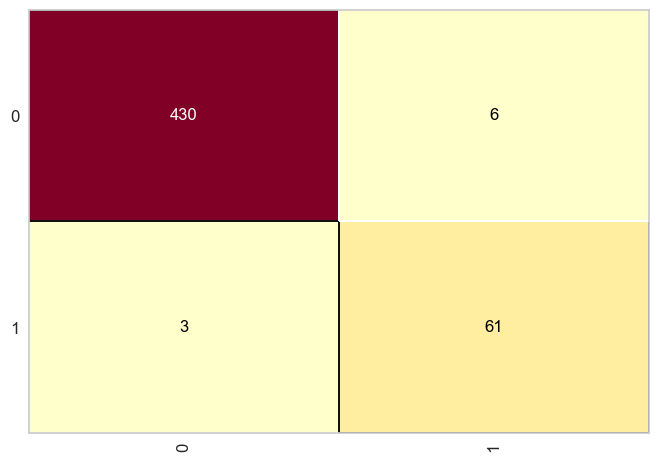

In [19]:
# Gerando matriz de confusão

from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [20]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [21]:
previsores = ['income' , 'age' , 'loan']
lista_classes = str(arvore_credit.classes_)
lista_classes   

'[0 1]'

[Text(0.47619047619047616, 0.9444444444444444, 'age <= -0.453\nentropy = 0.6\nsamples = 1500\nvalue = [1281, 219]\nclass = 0'),
 Text(0.42857142857142855, 0.8333333333333334, 'loan <= -0.253\nentropy = 0.963\nsamples = 565\nvalue = [346, 219]\nclass = 0'),
 Text(0.45238095238095233, 0.8888888888888888, 'True  '),
 Text(0.14285714285714285, 0.7222222222222222, 'income <= -1.241\nentropy = 0.284\nsamples = 263\nvalue = [250, 13]\nclass = 0'),
 Text(0.09523809523809523, 0.6111111111111112, 'loan <= -0.644\nentropy = 0.722\nsamples = 65\nvalue = [52, 13]\nclass = 0'),
 Text(0.047619047619047616, 0.5, 'entropy = 0.0\nsamples = 46\nvalue = [46, 0]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'income <= -1.64\nentropy = 0.9\nsamples = 19\nvalue = [6, 13]\nclass = 1'),
 Text(0.09523809523809523, 0.3888888888888889, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = 1'),
 Text(0.19047619047619047, 0.3888888888888889, 'loan <= -0.487\nentropy = 0.994\nsamples = 11\nvalue = [6, 5]\nclass = 0')

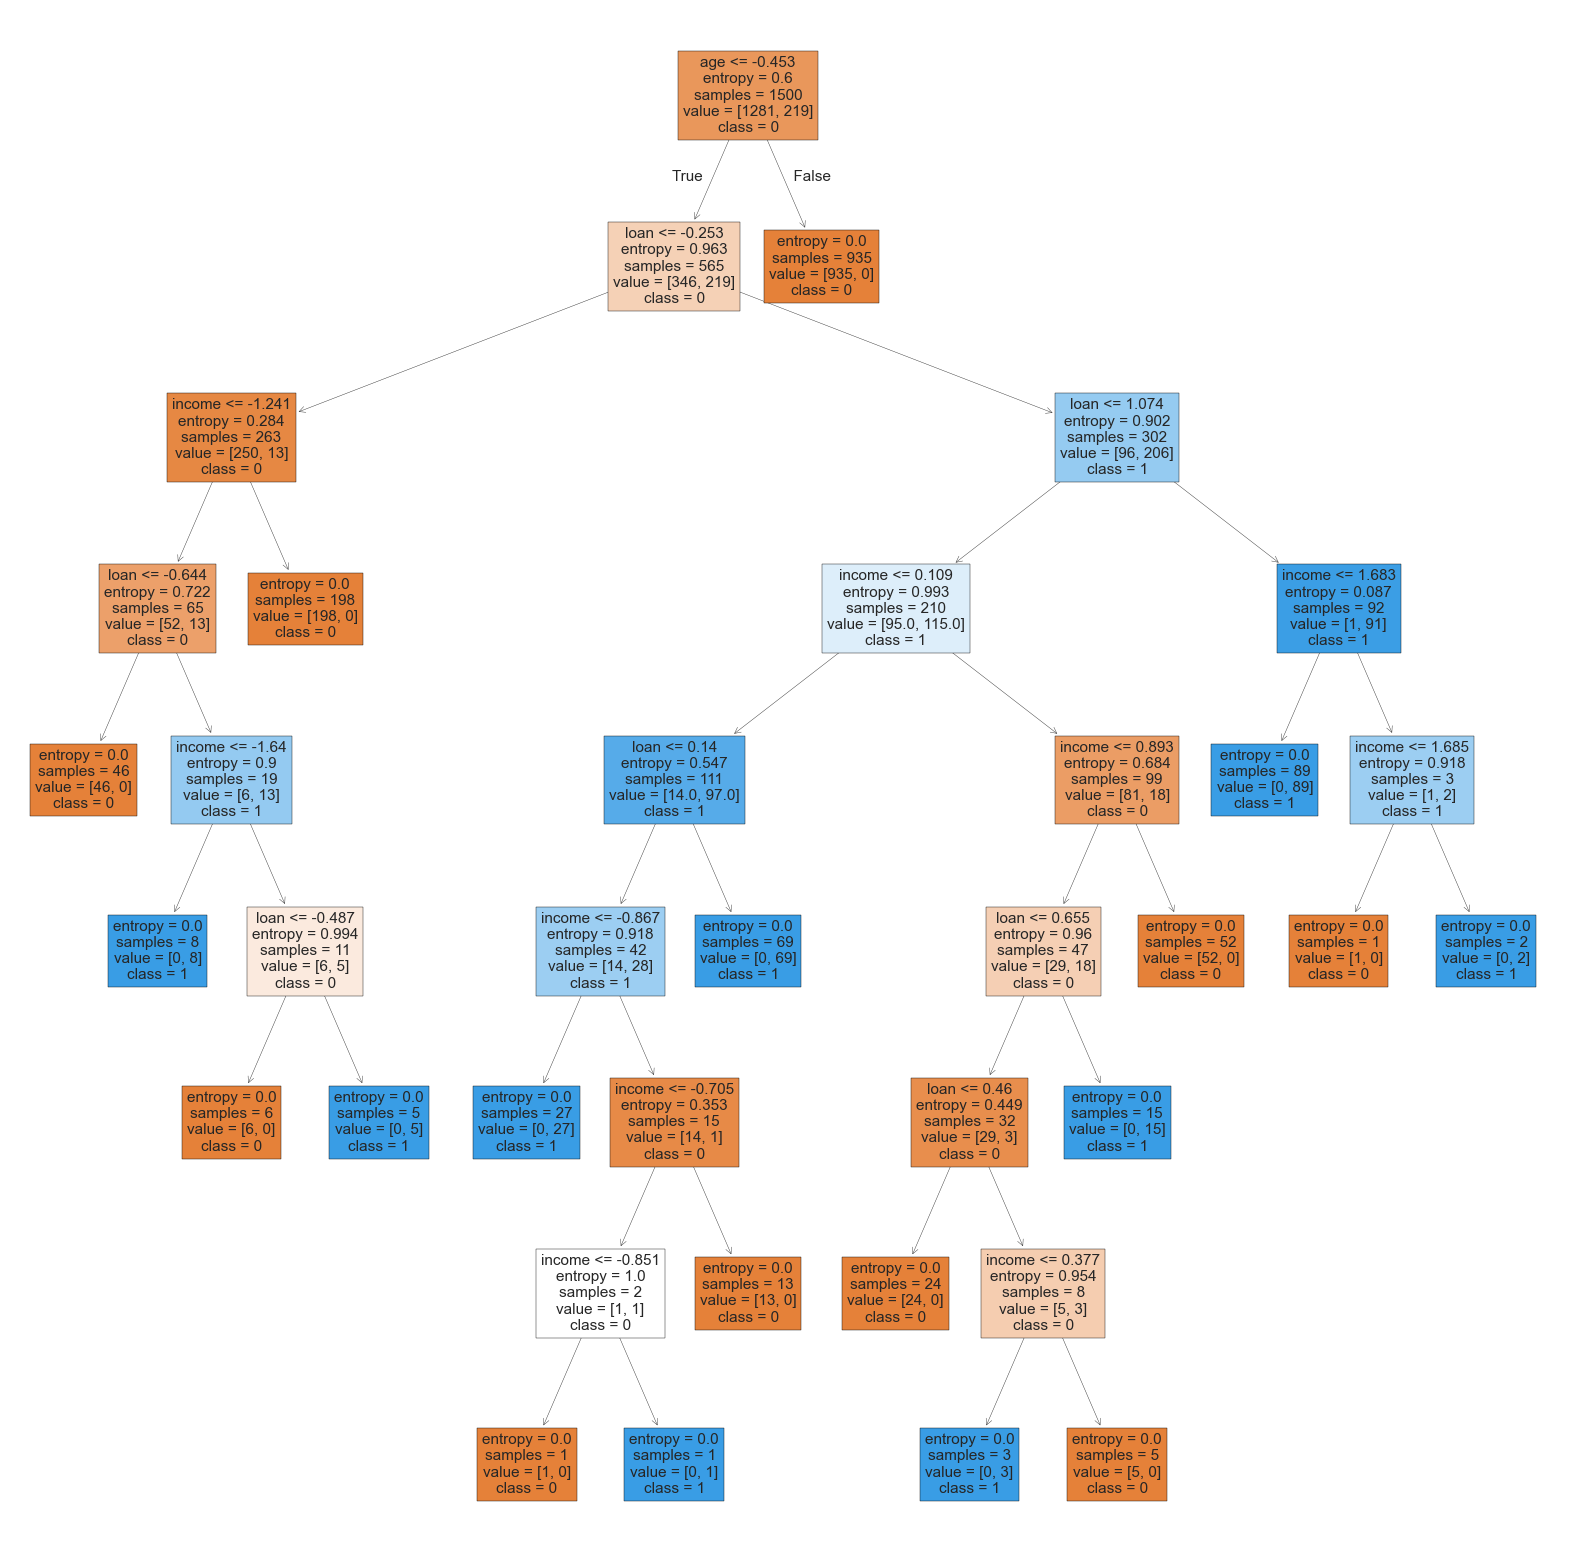

In [22]:
# Visualizando árvore

from matplotlib import pyplot as plt
from sklearn import tree



figura , eixos = plt.subplots(nrows =1 , ncols=1 , figsize=(20,20))
tree.plot_tree(arvore_credit , feature_names=previsores , class_names=['0','1']  ,filled=True)
#figura.savefig('arvoreDecisao_creditData.png') -> descomente caso queira salvar a figura

#### Conclusões a partir do algoritmo de Árvore de Decisão:

- O algoritmo encontrou 95% dos casos da classe 1 e acertou 91% destes encontrados
- O algoritmo encontrou 99% dos casos da classe 0 e acertou 99% destes encontrados

Conclui-se que o algoritmo se dá muito bem com os dados de ambas as classes 